# Бинарная классификация

Для уверенной работы с данными вам пригодится знание:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Sklearn - библиотеки с основными инструментами ML

Посмотрим, как пользоваться логистической регрессией в python для решения задач классификации.

Для примера будем пользоваться встроенным в `sklearn` датасетом для решения задачи бинарной классификации — `load_breast_cancer`.

В датасете содержатся числовые признаки женщин (результаты исследований, биологические характеристики), а целевая переменная (1 или 0) показывает, больна ли пациентка раком груди или нет.

**Наши цели на сегодня**

*  Обучить логистическую регрессию на представленном датасете.
*  Оценить качество полученной модели и сравнить с методом ближайших соседей.

## Загрузка данных и обучение модели

In [16]:
from sklearn.linear_model import LogisticRegression # модель классификации, которую будем использовать
from sklearn.datasets import load_breast_cancer
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [17]:
data = load_breast_cancer(as_frame=True)

X = data.data # матрица объект-признак
y = data.target # вектор целевой переменной

X.shape, y.shape

((569, 30), (569,))

Посмотрим на данные.

In [18]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
y[:100]

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Name: target, Length: 100, dtype: int32

Эксперты в области сказали, что признак *fractal dimension error* не нужен в этой задаче.

Давайте его удалим (заодно узнаем как это делается).

In [20]:
X.drop('fractal dimension error', axis=1, inplace=True)

Проверим, сбалансирована ли выборка.

In [21]:
len(y[y==0]), len(y[y==1])

(212, 357)

Баланса классов нет, но и перекос не такой сильный.

Для решения этой задачи будем использовать **линейную модель классификации — логистическую регрессию**.

Для начала разобъём данные на train и test (test — 20% от всех данных).

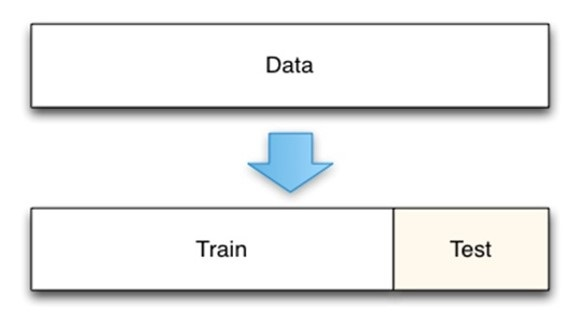

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler   # x -> (x - mean) / std

ss = StandardScaler()
ss.fit(Xtrain) # вычисляем mean и std

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns) # масштабирование
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [24]:
model = LogisticRegression() # объявляем модель

model.fit(Xtrain, ytrain) # обучаем модель

LogisticRegression()

In [25]:
pred_test = model.predict(Xtest) # предсказание классов

Посмотрим на предсказания модели и оценим долю правильных ответов.

In [26]:
pred_test[:5]

array([1, 0, 0, 1, 1])

In [27]:
accuracy_score(ytest, pred_test)

0.9736842105263158

Получили модель отличного качества! Но мы помним про дисбаланс классов, поэтому попозже надо посчитать и другие метрики.


## Интерпретация модели

Посмотрим на веса модели

In [28]:
model.coef_, model.intercept_

(array([[-0.42455444, -0.398298  , -0.38273006, -0.46092313, -0.08135889,
          0.55204417, -0.76765835, -1.12815464,  0.23961474,  0.14281978,
         -1.27954618,  0.20610129, -0.61528864, -0.91417608, -0.23278455,
          0.85478506,  0.27057413, -0.23033242,  0.49223995, -0.86540169,
         -1.33481747, -0.57016842, -0.83844082, -0.60877539, -0.00789531,
         -1.03021376, -0.81617316, -1.23603892,  0.06752478]]),
 array([0.39047579]))

In [29]:
import pandas as pd

coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())

coef_table.sort_values(by='Coefs')

,0,Coefs
20,worst texture,-1.334817
10,radius error,-1.279546
27,worst symmetry,-1.236039
7,mean concave points,-1.128155
25,worst concavity,-1.030214
13,area error,-0.914176
19,worst radius,-0.865402
22,worst area,-0.838441
26,worst concave points,-0.816173
6,mean concavity,-0.767658


Если вес у признака положительный, то признак вносит положительный вклад в ответ, то есть чем больше значение признака, тем больше это дает вклад в положительный класс объекта и наоборот.

## Вероятности.

Также мы можем посмотреть на предсказанные логистической регрессией вероятности.

In [30]:
probs = model.predict_proba(Xtest)[:,1] # предсказание вероятностей

probs[:5]

array([8.76566476e-01, 9.28787548e-06, 2.83217425e-03, 9.99407593e-01,
       9.99941553e-01])

Для каждого объекта модель выдаёт две вероятности: первое число — вероятность класса 0, вторая — вероятность класса 1 (можно проверить, что сумма вероятностей равна 1).

## Метод ближайших соседей

Существует еще один простой метод для решения задач классификации - метод ближайших соседей.

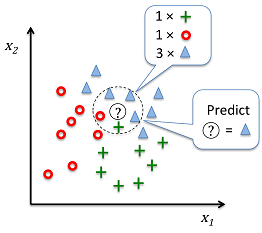

Попробуем применить метод ближайших соседей для решения поставленной задачи.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()

In [38]:
model3.fit(Xtrain, ytrain)

pred_test3 = model3.predict(Xtest)

accuracy_score(ytest, pred_test3)

0.956140350877193

## Анализ матрицы ошибок и ROC-AUC

In [39]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [40]:
confusion_matrix(ytest, pred_test)

array([[41,  2],
       [ 1, 70]], dtype=int64)

In [36]:
score = roc_auc_score(ytest, probs[:,1])
score

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [41]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(ytest, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score);

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed